In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
!pip install tqdm

In [60]:
key = 'L49TNJ1SKAPIG4BA'

In [61]:
ts = TimeSeries(key, output_format = 'pandas')
data, meta = ts.get_daily('AAPL', outputsize = 'full')
columns = ['Open', 'High', 'Low', 'Close', 'Volume']
data.columns = columns
print(data)


               Open    High       Low   Close      Volume
date                                                     
2025-06-25  201.450  203.67  200.6201  201.56  39525730.0
2025-06-24  202.590  203.44  200.2000  200.30  54064033.0
2025-06-23  201.625  202.30  198.9600  201.50  55814272.0
2025-06-20  198.235  201.70  196.8550  201.00  96813542.0
2025-06-18  195.940  197.57  195.0700  196.58  45394689.0
...             ...     ...       ...     ...         ...
1999-11-05   84.620   88.37   84.0000   88.31   3721500.0
1999-11-04   82.060   85.37   80.6200   83.62   3384700.0
1999-11-03   81.620   83.25   81.0000   81.50   2932700.0
1999-11-02   78.000   81.69   77.3100   80.25   3564600.0
1999-11-01   80.000   80.69   77.3700   77.62   2487300.0

[6451 rows x 5 columns]


In [62]:
ti = TechIndicators(key, output_format = 'pandas')
roc, meta = ti.get_roc('AAPL')
sma, meta = ti.get_sma('AAPL')

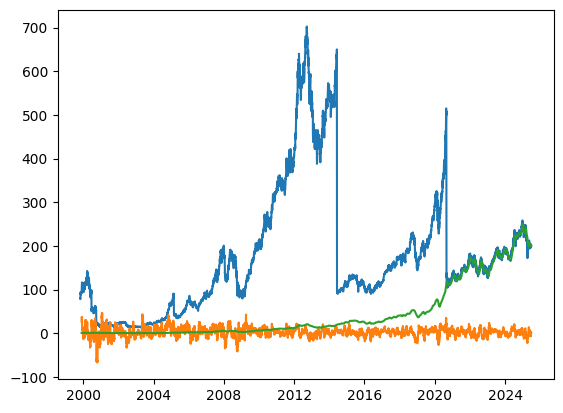

In [63]:
plt.plot(data['Open'])
plt.plot(roc)
plt.plot(sma)

In [64]:

data = data.sort_index()
data['Increase'] = (data['Close'] - data['Close'].shift(7)) / data['Close'].shift(7)
data = data.dropna(subset=['Increase'])
data = data.round(2)

In [65]:
train_data = data.loc['2012-02-01' : '2022-04-06']
test_data = data.loc['2022-04-07' : '2025-01-01']
print(train_data)

              Open    High     Low   Close       Volume  Increase
date                                                             
2012-02-01  458.41  458.99  455.55  456.19    9644500.0      0.07
2012-02-02  455.90  457.17  453.98  455.12    6671300.0      0.08
2012-02-03  457.30  460.00  455.56  459.68   10235700.0      0.03
2012-02-06  458.38  464.98  458.20  463.97    8907600.0      0.04
2012-02-07  465.25  469.75  464.58  468.83   11293700.0      0.05
...            ...     ...     ...     ...          ...       ...
2022-03-31  177.84  178.03  174.40  174.61  103049285.0      0.03
2022-04-01  174.03  174.88  171.94  174.31   78751328.0      0.02
2022-04-04  174.57  178.49  174.44  178.44   76545983.0      0.03
2022-04-05  177.50  178.30  174.42  175.06   70902999.0      0.00
2022-04-06  172.36  173.63  170.13  171.83   89058782.0     -0.02

[2563 rows x 6 columns]


In [66]:
roc = roc.sort_index()
roc = roc.round(0).astype(int)


In [67]:

train_roc = roc.loc['2012-02-01' : '2022-04-06']
test_roc = roc.loc['2022-04-07' : '2025-01-01']


In [68]:
train_data_close = train_data['Close']
print(train_data_close.iloc[0])
test_data_close = test_data['Close']
print(len(train_roc))
print(len(train_data))
print(len(test_roc))
print(len(test_data))  
print(train_roc)

456.19
2563
2563
687
687
            ROC
date           
2012-02-01   11
2012-02-02   10
2012-02-03   10
2012-02-06   10
2012-02-07   11
...         ...
2022-03-31    5
2022-04-01    7
2022-04-04   12
2022-04-05   11
2022-04-06    5

[2563 rows x 1 columns]


In [69]:
states = []
for i in range(-150, 150):
    states.append(i)
print(states)

[-150, -149, -148, -147, -146, -145, -144, -143, -142, -141, -140, -139, -138, -137, -136, -135, -134, -133, -132, -131, -130, -129, -128, -127, -126, -125, -124, -123, -122, -121, -120, -119, -118, -117, -116, -115, -114, -113, -112, -111, -110, -109, -108, -107, -106, -105, -104, -103, -102, -101, -100, -99, -98, -97, -96, -95, -94, -93, -92, -91, -90, -89, -88, -87, -86, -85, -84, -83, -82, -81, -80, -79, -78, -77, -76, -75, -74, -73, -72, -71, -70, -69, -68, -67, -66, -65, -64, -63, -62, -61, -60, -59, -58, -57, -56, -55, -54, -53, -52, -51, -50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39, -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 5

In [70]:
q_table = pd.DataFrame(0, index = states, columns = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
print(q_table)

      0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.0
-150    0    0    0    0    0    0    0    0    0    0    0
-149    0    0    0    0    0    0    0    0    0    0    0
-148    0    0    0    0    0    0    0    0    0    0    0
-147    0    0    0    0    0    0    0    0    0    0    0
-146    0    0    0    0    0    0    0    0    0    0    0
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
 145    0    0    0    0    0    0    0    0    0    0    0
 146    0    0    0    0    0    0    0    0    0    0    0
 147    0    0    0    0    0    0    0    0    0    0    0
 148    0    0    0    0    0    0    0    0    0    0    0
 149    0    0    0    0    0    0    0    0    0    0    0

[300 rows x 11 columns]


In [77]:
# Training parameters
n_training_episodes = 500
learning_rate = 0.7

# Evaluation parameters
n_eval_episodes = 10000

# Environment parameters
env_id = "FrozenLake-v1"
max_steps = 99
gamma = 0.95
eval_seed = []

# Exploration parameters
max_epsilon = 1.0
min_epsilon = 0.05
decay_rate = 0.0005

class environment:

    def __init__(self, data, roc):
        self.data = data
        self.roc = roc
        self.balance = 100
        self.holding = 0
        self.index = 0
        self.buy_price = None
        self.sell_price = None
        self.num_shares = 0
        self.trend = None
        self.balance_history = []
        self.price = None
        self.rewards = []
        self.total_reward = 0
        self.total = 100
        self.trades = []

    def step(self, action):

        
        trade = [] 
        if self.index < len(self.data - 7):
            data = self.data
            index = self.index
            
            total = self.get_net_worth()
            holding = (self.num_shares * data.iloc[self.index]) / total
            trade.append(total)
            trade.append(holding)
            trade.append(action)
            if action > holding:
                to_buy = (action - holding) * total
                new_balance = self.balance - to_buy
                if new_balance >= 0:
                    
                    new_shares = to_buy / self.data.iloc[self.index]
                    self.balance -= to_buy
                    self.num_shares += new_shares
            elif action < holding:
                to_sell = (holding - action) * total
                shares_to_sell = to_sell / data.iloc[self.index]
                new_num_shares = self.num_shares - shares_to_sell
                if new_num_shares >= 0:
                    self.num_shares = new_num_shares
                    self.balance += to_sell
            trade.append(self.num_shares)
            trade.append(self.balance)
            future_value = (self.num_shares * self.data.iloc[self.index + 7]) + self.balance 
            reward = (future_value - total) / total
            trade.append(self.data.iloc[self.index])
            self.index += 1
            self.trades.append(trade)
            self.total_reward += reward
            self.rewards.append(self.total_reward)
            return (reward, False)
        else:
            return (0, True)
        
    def reset(self):
        self.balance = 100
        self.holding = 0
        self.index = 0
        self.buy_price = None
        self.sell_price = None
        self.num_shares = 0
        self.trend = None
        self.balance_history = []
        self.trades = []
    
    def get_net_worth(self):
        
        total = self.balance + (self.num_shares * self.data.iloc[self.index])
        return total
        
    def get_state(self):
        net_worth = self.get_net_worth()
        self.balance_history.append(net_worth)
        return self.roc["ROC"].iloc[self.index]


In [78]:
import numpy as np
import random
def train(n_training_episodes, min_epsilon, max_epsilon, decay_rate, env, max_steps, Qtable):
    for episode in range(n_training_episodes):
  
 
        epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
        # Reset the environment
        env.reset()  
        state = env.get_state()
        step = 0
        done = False
        actions = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
        
    
        # repeat
        while env.index < (len(env.data) - 7):
       
            if random.uniform(0,1) > epsilon:
                action_index = Qtable.loc[state, :].argmax()
                action = Qtable.columns[action_index]
            else:
                action = random.choice(actions)
          
          
            reward, done = env.step(action)
            if done:
                break  
            new_state = env.get_state()
           
    
           
            Qtable.loc[state, action] = Qtable.loc[state, action] + learning_rate * (reward + gamma * (Qtable.loc[new_state, :].argmax()) - Qtable.loc[state, action])
          
          
    
            # If done, finish the episode
            if done:
                break
         
            # Our state is the new state
            state = new_state
    return Qtable

In [84]:
env = environment(train_data_close, train_roc)
print(env.get_state())
print(env.balance)
print(env.price)
print(q_table)

11
100
None
      0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.0
-150    0    0    0    0    0    0    0    0    0    0    0
-149    0    0    0    0    0    0    0    0    0    0    0
-148    0    0    0    0    0    0    0    0    0    0    0
-147    0    0    0    0    0    0    0    0    0    0    0
-146    0    0    0    0    0    0    0    0    0    0    0
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
 145    0    0    0    0    0    0    0    0    0    0    0
 146    0    0    0    0    0    0    0    0    0    0    0
 147    0    0    0    0    0    0    0    0    0    0    0
 148    0    0    0    0    0    0    0    0    0    0    0
 149    0    0    0    0    0    0    0    0    0    0    0

[300 rows x 11 columns]


In [85]:

Qtable = train(n_training_episodes, min_epsilon, max_epsilon, decay_rate, env, max_steps, q_table)

/var/folders/jk/qtzrzz695z1gpn8f1qgj7n2m0000gn/T/ipykernel_649/810146677.py:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.017138253797759687' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Qtable.loc[state, action] = Qtable.loc[state, action] + learning_rate * (reward + gamma * (Qtable.loc[new_state, :].argmax()) - Qtable.loc[state, action])
/var/folders/jk/qtzrzz695z1gpn8f1qgj7n2m0000gn/T/ipykernel_649/810146677.py:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.014605378801195265' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Qtable.loc[state, action] = Qtable.loc[state, action] + learning_rate * (reward + gamma * (Qtable.loc[new_state, :].argmax()) - Qtable.loc[state, action])
/var/folders/jk/qtzrzz695z1gpn8f1qgj7n2m0000gn/T/i

In [37]:
print(Qtable.loc[-20 : 20])

          0.0       0.1       0.2       0.3       0.4       0.5       0.6  \
-20  8.928329  1.674885  7.187459  2.111931  1.135185  7.275533  4.771748   
-19  7.415728  3.702848  4.683712  6.825814  3.031474  6.470907  3.412482   
-18  5.114946  2.341831  5.191283  7.427240  7.981668  3.740361  1.877455   
-17  4.159186  3.360375  7.608859  2.043045  2.985337  4.080748  4.529126   
-16  3.316231  3.104610  1.714075  8.279987  1.602487  0.915296  7.333981   
-15  6.828205  8.057844  4.973702  1.507649  4.671335  1.886227  4.486134   
-14  2.742326  5.512805  1.220354  6.322676  5.997307  2.105065  1.726724   
-13  8.887610  4.988624  6.366243  1.470217  7.627184  8.594220  3.385847   
-12  8.883477  3.063841  0.767551  7.149058  4.062885  4.869263  8.065193   
-11  6.522803  6.397404  0.800158  5.756869  2.231953  5.549048  6.027409   
-10  4.365951  4.691283  0.961639  5.329703  7.804825  5.329274  6.299980   
-9   5.450608  7.748221  4.271886  1.754301  1.845530  5.635548  6.572096   

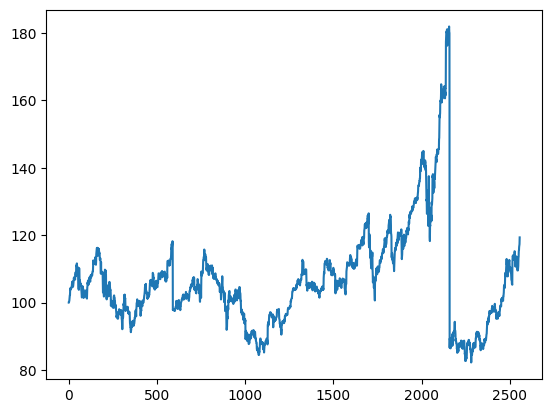

In [86]:
plt.plot(env.balance_history)

In [59]:
#print(env.trades)

Q table row = state, column = action

In [87]:
def test(n_training_episodes, min_epsilon, max_epsilon, decay_rate, env, max_steps, Qtable):
    
    # Reset the environment
    env.reset()  
    state = env.get_state()
    step = 0
    done = False
    actions = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
    action_history = []
    
    # repeat
    epsilon = 0.1
    while env.index < (len(env.data) - 7):
       
     
        action_index = Qtable.loc[state, :].argmax()
        action = Qtable.columns[action_index]
        action_history.append(action)
        
        
          
          
        reward, done = env.step(action)
        if done:
            break  
        new_state = env.get_state()
           
    
           
            
          
          
    
            # If done, finish the episode
        if done:
            break
         
        # Our state is the new state
        state = new_state
    #print(action_history)
   

In [88]:
test_env = environment(test_data_close, test_roc)

In [89]:
test(n_training_episodes, min_epsilon, max_epsilon, decay_rate, test_env, max_steps, q_table)

In [90]:
print(len(test_env.balance_history))
print(len(test_data))
print(test_data)

681
687
              Open    High     Low   Close      Volume  Increase
date                                                            
2022-04-07  171.16  173.36  169.85  172.14  77594650.0     -0.04
2022-04-08  171.78  171.78  169.20  170.09  76575508.0     -0.04
2022-04-11  168.71  169.03  165.50  165.75  72246706.0     -0.05
2022-04-12  168.02  169.87  166.64  167.66  79265181.0     -0.04
2022-04-13  167.39  171.04  166.77  170.40  70618925.0     -0.05
...            ...     ...     ...     ...         ...       ...
2024-12-24  255.49  258.21  255.29  258.20  23234705.0      0.04
2024-12-26  258.19  260.10  257.63  259.02  27262983.0      0.03
2024-12-27  257.83  258.70  253.06  255.59  42355321.0      0.01
2024-12-30  252.23  253.50  250.75  252.20  35557542.0      0.02
2024-12-31  252.44  253.28  249.43  250.42  39480718.0      0.00

[687 rows x 6 columns]


In [112]:
dates = pd.bdate_range(start='2022-04-07', periods=len(test_env.balance_history))
balances = pd.DataFrame({'Date': dates, 'Balance': test_env.balance_history})
balances.set_index('Date', inplace=True)
print(balances)

               Balance
Date                  
2022-04-07  100.000000
2022-04-08  100.000000
2022-04-11   99.234523
2022-04-12   99.577578
2022-04-13  100.716727
...                ...
2024-11-08  120.566955
2024-11-11  120.684141
2024-11-12  119.132978
2024-11-13  119.132978
2024-11-14  119.132978

[681 rows x 1 columns]


In [113]:
print((test_env.balance_history[-1] - test_env.balance_history[0]) / test_env.balance_history[0])

0.19132977768509676


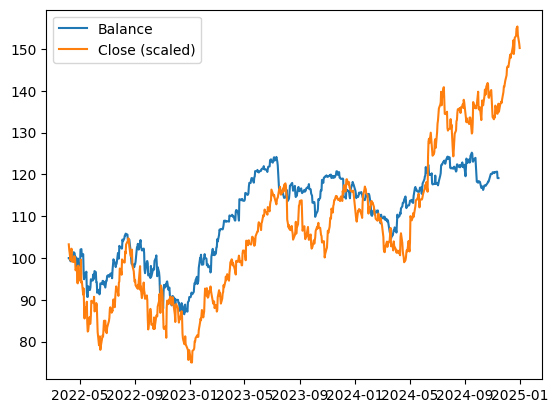

In [114]:
plt.plot(balances, label="Balance")
plt.plot(test_data["Close"] * 0.6, label="Close (scaled)")
plt.legend()
plt.show()


In [79]:
test_increase_array = []
test_history_array = []
num = 0
for i in range(100):
    print(num)
    num += 1
    env = environment(train_data_close, train_roc)
    q_table = pd.DataFrame(0.0, index = states, columns = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
    Qtable = train(n_training_episodes, min_epsilon, max_epsilon, decay_rate, env, max_steps, q_table)
    test_env = environment(test_data_close, test_roc)
    test(n_training_episodes, min_epsilon, max_epsilon, decay_rate, test_env, max_steps, q_table)
    test_increase_array.append((test_env.balance_history[-1] - test_env.balance_history[0]) / test_env.balance_history[0])
    test_history_array.append(test_env.balance_history)
print(test_increase_array)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32


KeyboardInterrupt: 

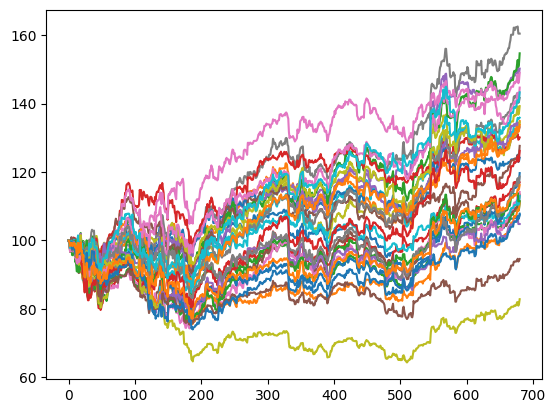

In [80]:
for i in test_history_array:
    plt.plot(i)

plt.show()

In [81]:
underlying_increase = (test_data["Close"][-8] - test_data["Close"][0]) / test_data["Close"][0]
print(underlying_increase)

0.45108632508423385


/var/folders/jk/qtzrzz695z1gpn8f1qgj7n2m0000gn/T/ipykernel_1521/3728066726.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  underlying_increase = (test_data["Close"][-8] - test_data["Close"][0]) / test_data["Close"][0]


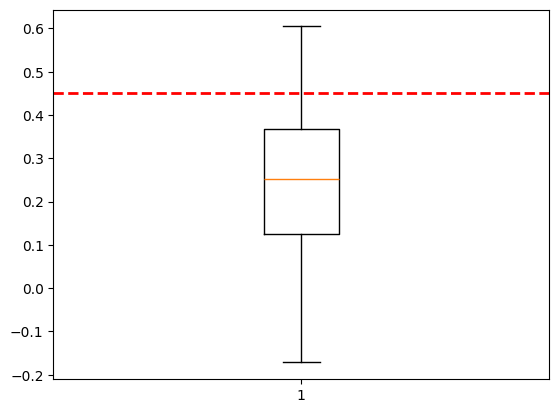

In [82]:
plt.boxplot(test_increase_array)
plt.axhline(y=underlying_increase, color='red', linestyle='--', linewidth=2)
plt.show()